# **Libraries Used**

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [188]:
df=pd.read_csv('Amazon Sale Report.csv')
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [189]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')

# **Column Explanation as dictionary**

In [190]:
column_explanation = {
    "index": "Dataset ka row number (auto generated index).",
    "Order ID": "Unique order identification number from Amazon.",
    "Date": "Order placed date.",
    "Status": "Order ka status (Delivered, Cancelled, Pending, etc.).",
    "Fulfilment": "Kisne order fulfill kiya (Merchant / Amazon).",
    "Sales Channel": "Jis platform se order aaya (Amazon.in etc.).",
    "ship-service-level": "Shipping service type (Standard, Express, etc.).",
    "Category": "Product category (e.g., T-shirt, Shirt, etc.).",
    "Size": "Product ka size (S, M, L, XL, etc.).",
    "Courier Status": "Shipment ka status (Shipped, On the Way, etc.).",
    "Qty": "Quantity of items in the order.",
    "currency": "Currency type (INR, USD, etc.).",
    "Amount": "Order value (total sales amount).",
    "ship-city": "Customer ka delivery city.",
    "ship-state": "Customer ka delivery state.",
    "ship-postal-code": "Delivery postal/zip code.",
    "ship-country": "Delivery country.",
    "B2B": "Boolean column (True/False) → Business to Business order ya normal customer order.",
    "fulfilled-by": "Kisne ship kiya (Amazon / Merchant).",
    "New": "(Likely derived column, may indicate new order or not).",
    "PendingS": "Pending shipment/order status ka flag."
}

# Print explanation in readable format
print("📑 Column Explanation:\n")
for col, desc in column_explanation.items():
    print(f"{col} → {desc}")


📑 Column Explanation:

index → Dataset ka row number (auto generated index).
Order ID → Unique order identification number from Amazon.
Date → Order placed date.
Status → Order ka status (Delivered, Cancelled, Pending, etc.).
Fulfilment → Kisne order fulfill kiya (Merchant / Amazon).
Sales Channel → Jis platform se order aaya (Amazon.in etc.).
ship-service-level → Shipping service type (Standard, Express, etc.).
Category → Product category (e.g., T-shirt, Shirt, etc.).
Size → Product ka size (S, M, L, XL, etc.).
Courier Status → Shipment ka status (Shipped, On the Way, etc.).
Qty → Quantity of items in the order.
currency → Currency type (INR, USD, etc.).
Amount → Order value (total sales amount).
ship-city → Customer ka delivery city.
ship-state → Customer ka delivery state.
ship-postal-code → Delivery postal/zip code.
ship-country → Delivery country.
B2B → Boolean column (True/False) → Business to Business order ya normal customer order.
fulfilled-by → Kisne ship kiya (Amazon / Merch

In [191]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [192]:
# Handle missing values
# For numerical columns, fill with median.
df['Amount'] = df['Amount'].fillna(df['Amount'].mean())

In [193]:
df['ship-postal-code'].mean()

np.float64(463945.6777440845)

In [194]:
df['ship-postal-code']=df['ship-postal-code'].fillna(463819.77758652775)

In [195]:
df['ship-state'].mode()

,ship-state
0,MAHARASHTRA


In [196]:
df['ship-state']=df['ship-state'].fillna('MAHARASHTRA')

In [197]:
df['ship-city'].mode()

,ship-city
0,BENGALURU


In [198]:
df['ship-city'] = df['ship-city'].fillna('BENGALURU')

In [199]:
df['currency'].mode()

,currency
0,INR


In [200]:
df['currency']=df['currency'].fillna('INR')

In [201]:
df['ship-country'].mode()

,ship-country
0,IN


In [202]:
df['ship-country']=df['ship-country'].fillna('IN')

In [203]:
df=df.drop('fulfilled-by', axis=1)

In [204]:
df=df.drop('New', axis=1)

In [205]:
df=df.drop('PendingS', axis=1)

In [206]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [207]:
df.shape

(128976, 18)

In [208]:
# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [209]:
# Create new features
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.day_name()


In [210]:
df.head(2)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,month,year,day_of_week
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,4,2022,Saturday
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,4,2022,Saturday


In [211]:
df.shape

(128976, 21)

# **Sales Overview Analysis**

## **Total Sales Amount (INR)**

In [212]:
total_Amount = df['Amount'].sum()

In [213]:
total_Amount=int(total_Amount)

In [214]:
print("\nTotal Sales Amount (INR):",total_Amount)


Total Sales Amount (INR): 83648955


## **Average Order Value (INR)**

In [215]:
Average_order_value = df['Amount'].mean()

In [216]:
print("Average Order Value (INR):", Average_order_value)

Average Order Value (INR): 648.5621760909752


## **Maximum Order Value (INR)**

In [217]:
Maximum_order_value = df['Amount'].max()

In [218]:
print("Order Maxmimum Value (INR):", Maximum_order_value)

Order Maxmimum Value (INR): 5584.0


## **Total Orders: 120229**

In [219]:
print("Total Orders:", df["Order ID"].nunique())

Total Orders: 120229


## **Status distribution**

In [220]:
status_distribution = df["Status"].value_counts()
status_distribution

,count
Status,
Shipped,77815
Shipped - Delivered to Buyer,28756
Cancelled,18334
Shipped - Returned to Seller,1954
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


## **Category-wise sales**

In [221]:
category_sales = df.groupby("Category")["Amount"].sum().sort_values(ascending=False)

In [222]:
category_sales

,Amount
Category,
T-shirt,4.131004e+07
Shirt,2.334982e+07
Blazzer,1.173201e+07
Trousers,5.642031e+06
Perfume,8.322248e+05
Wallet,4.875935e+05
Socks,1.637287e+05
Shoes,1.305898e+05
Watch,9.150000e+02


## **Size preference**

In [223]:
size_preference =(df["Size"].value_counts())

In [224]:
size_preference

,count
Size,
M,22373
L,21807
XL,20549
XXL,17806
S,16776
3XL,14643
XS,11056
Free,2251
6XL,738


## **Monthly sales trend**

In [225]:
monthly_sales = df.groupby("month")["Amount"].sum()

In [226]:
monthly_sales

,Amount
month,
3,1.075209e+05
4,3.078448e+07
5,2.785048e+07
6,2.490648e+07


## **Yearly Sales trend**

In [227]:
yearly_sales = df.groupby("year")["Amount"].sum()

In [228]:
yearly_sales

,Amount
year,
2022,8.364896e+07


##  **Day-of-week sales trend**

In [229]:
day_sales = df.groupby("day_of_week")["Amount"].sum()
day_sales

,Amount
day_of_week,
Friday,1.152813e+07
Monday,1.204418e+07
Saturday,1.203534e+07
Sunday,1.275778e+07
Thursday,1.102243e+07
Tuesday,1.225257e+07
Wednesday,1.200852e+07


#  **Visualization**

#### **This chart shows total sales for each product category. It helps identify which product types contribute the most to overall revenue.**

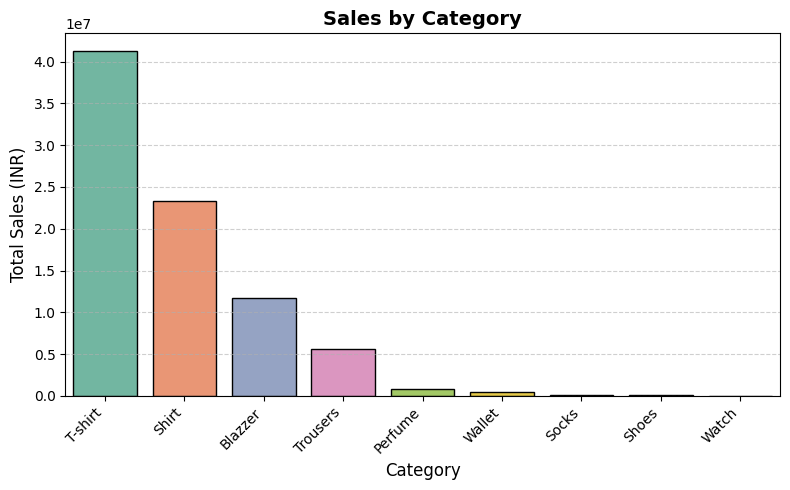

In [230]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=category_sales.index,
    y=category_sales.values,
    palette="Set2",          # soft professional colors
    edgecolor="black"        # bar borders for clarity
)

plt.title("Sales by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)

plt.xticks(rotation=45, ha="right")       # labels readable
plt.grid(axis="y", linestyle="--", alpha=0.6)  # light horizontal grid
plt.tight_layout()
plt.show()


#### **This chart shows how sales change month by month. It helps identify seasonal patterns, growth trends, and months with the highest or lowest sales.**

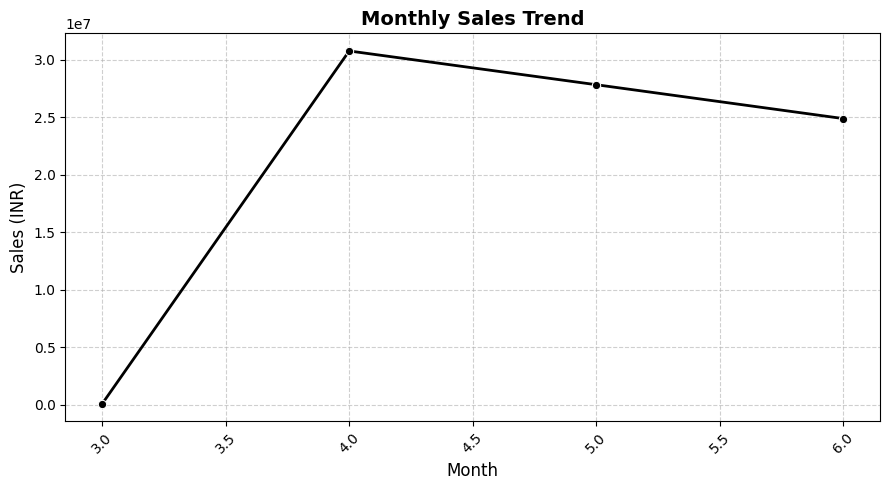

In [231]:
plt.figure(figsize=(9,5))
sns.lineplot(
    x=monthly_sales.index,
    y=monthly_sales.values,
    marker="o",
    color="black",         # professional black
    linewidth=2,
    markersize=6
)

plt.title("Monthly Sales Trend", fontsize=14, fontweight="bold")
plt.xlabel("Month", fontsize=12)
plt.ylabel("Sales (INR)", fontsize=12)

plt.grid(True, linestyle="--", alpha=0.6)   # clean grid
plt.xticks(rotation=45)                     # readable month labels
plt.tight_layout()
plt.show()


#### **This chart shows sales performance across different days of the week. It highlights which weekdays generate the highest sales and helps identify peak shopping days.**

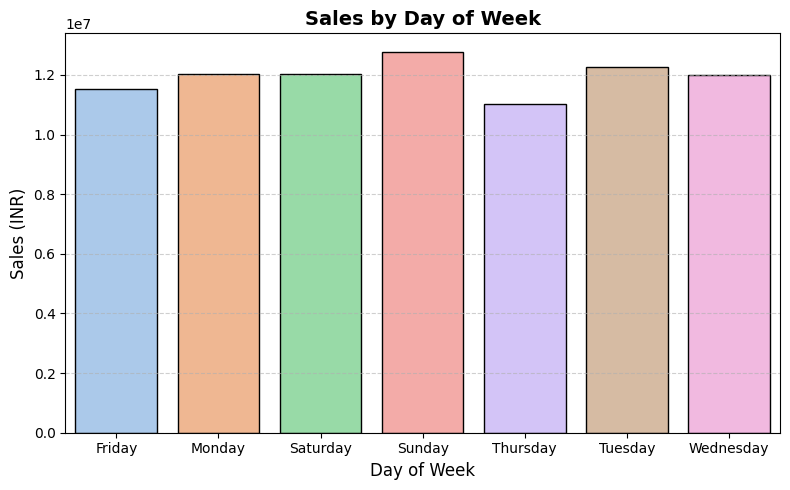

In [232]:
plt.figure(figsize=(8,5))
sns.barplot(
    x=day_sales.index,
    y=day_sales.values,
    palette="pastel",        # soft colors
    edgecolor="black"        # bar borders
)

plt.title("Sales by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Sales (INR)", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.6)  # light horizontal grid
plt.tight_layout()
plt.show()


##  **Top 5 Cities by Sales**

In [233]:
city_sales = df.groupby("ship-city")["Amount"].sum().sort_values(ascending=False).head(5)
city_sales

,Amount
ship-city,
BENGALURU,7.211993e+06
HYDERABAD,5.250570e+06
MUMBAI,3.870469e+06
NEW DELHI,3.836915e+06
CHENNAI,3.292147e+06


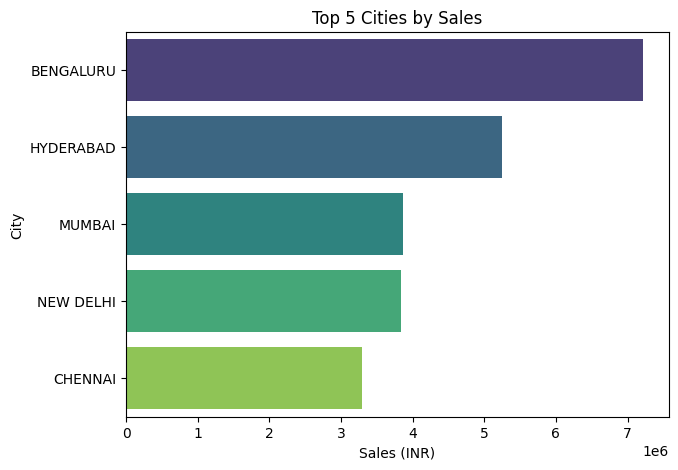

In [234]:
plt.figure(figsize=(7,5))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="viridis")
plt.title("Top 5 Cities by Sales")
plt.xlabel("Sales (INR)")
plt.ylabel("City")
plt.show()

## **Top 5 States by Sales**

In [235]:
state_sales = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(5)
state_sales

,Amount
ship-state,
MAHARASHTRA,1.413174e+07
KARNATAKA,1.108645e+07
TELANGANA,7.365120e+06
UTTAR PRADESH,7.271455e+06
TAMIL NADU,6.956962e+06


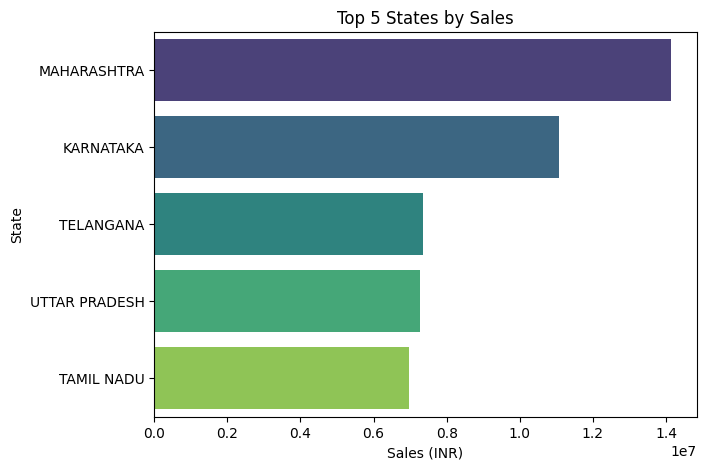

In [236]:
plt.figure(figsize=(7,5))
sns.barplot(x=state_sales.values, y=state_sales.index, palette="viridis")
plt.title("Top 5 States by Sales")
plt.xlabel("Sales (INR)")
plt.ylabel("State")
plt.show()

### **Status-wise Sales Amount**


In [237]:
status_sales = df.groupby("Status")["Amount"].sum().sort_values(ascending=False).head(7)
status_sales

,Amount
Status,
Shipped,5.046509e+07
Shipped - Delivered to Buyer,1.864757e+07
Cancelled,1.182869e+07
Shipped - Returned to Seller,1.272444e+06
Shipped - Picked Up,6.612520e+05
Pending,4.315681e+05
Pending - Waiting for Pick Up,1.921380e+05


#### **This chart shows total sales generated under each order status (Delivered, Shipped, Cancelled, etc.). It highlights which order outcomes contribute the most to revenue.**

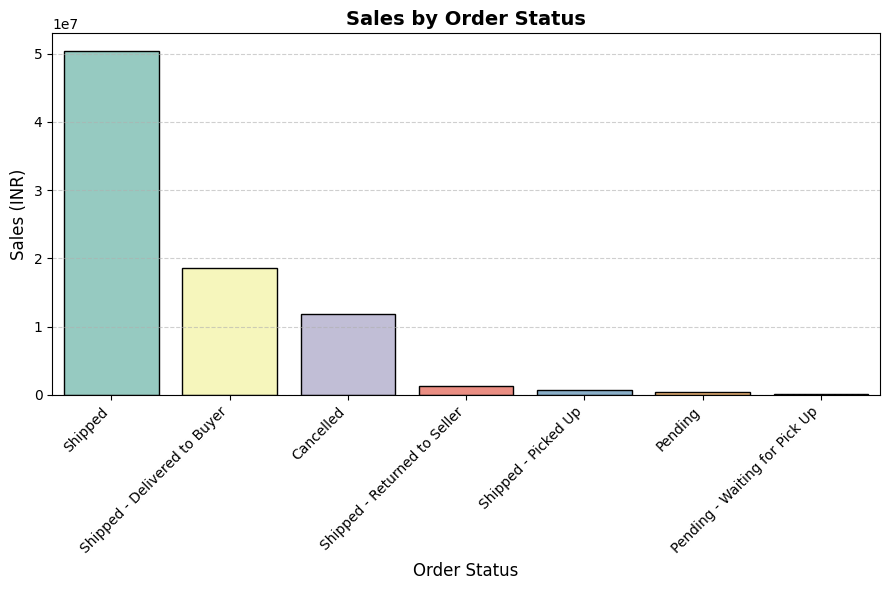

In [238]:
plt.figure(figsize=(9,6))
sns.barplot(
    x=status_sales.index,
    y=status_sales.values,
    palette="Set3",          # soft professional colors
    edgecolor="black"        # bar edges for clarity
)

plt.title("Sales by Order Status", fontsize=14, fontweight="bold")
plt.xlabel("Order Status", fontsize=12)
plt.ylabel("Sales (INR)", fontsize=12)

plt.xticks(rotation=45, ha="right")  # better readability
plt.grid(axis="y", linestyle="--", alpha=0.6)  # light horizontal grid
plt.tight_layout()
plt.show()


## **Courier Status Count**

In [239]:
Courier_status = df["Courier Status"].value_counts()


In [240]:
Courier_status

,count
Courier Status,
Shipped,109486
On the Way,6870
Unshipped,6680
Cancelled,5940


#### **This chart shows the distribution of orders across different courier statuses, such as shipped, in transit, delivered, or cancelled. It helps track logistics performance and identify bottlenecks.**

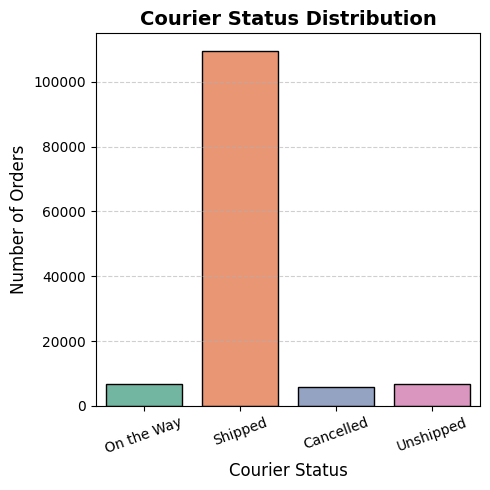

In [241]:
plt.figure(figsize=(5,5))
sns.countplot(
    x="Courier Status",
    data=df,
    palette="Set2",          # professional color set
    edgecolor="black"        # bar borders for clarity
)

plt.title("Courier Status Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Courier Status", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)

plt.xticks(rotation=20)      # tilt labels for readability
plt.grid(axis="y", linestyle="--", alpha=0.6)  # light grid on y-axis
plt.tight_layout()
plt.show()


## **B2B vs Non-B2B Sales**

In [242]:
b2b_sales = df.groupby("B2B")["Amount"].sum()

In [243]:
b2b_sales

,Amount
B2B,
False,8.303932e+07
True,6.096395e+05


#### **This chart shows the sales share between B2B (Business-to-Business) and Non-B2B orders. It highlights which segment contributes more to overall sales**

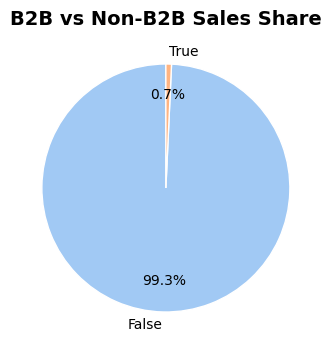

In [244]:
plt.figure(figsize=(4,5))
plt.pie(
    b2b_sales,
    labels=b2b_sales.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=sns.color_palette("pastel")[:2],  # soft 2 colors
    wedgeprops={"edgecolor": "white"},       # white borders
    textprops={"fontsize":10},               # readable text
    pctdistance=0.75,                        # % text thoda andar
    labeldistance=1.1                        # labels thoda bahar
)
plt.title("B2B vs Non-B2B Sales Share", fontsize=14, fontweight="bold")
plt.show()


## **Category + Size Heatmap**

In [245]:
category_size = df.pivot_table(index="Category", columns="Size",
                               values="Amount", aggfunc="sum", fill_value=0)


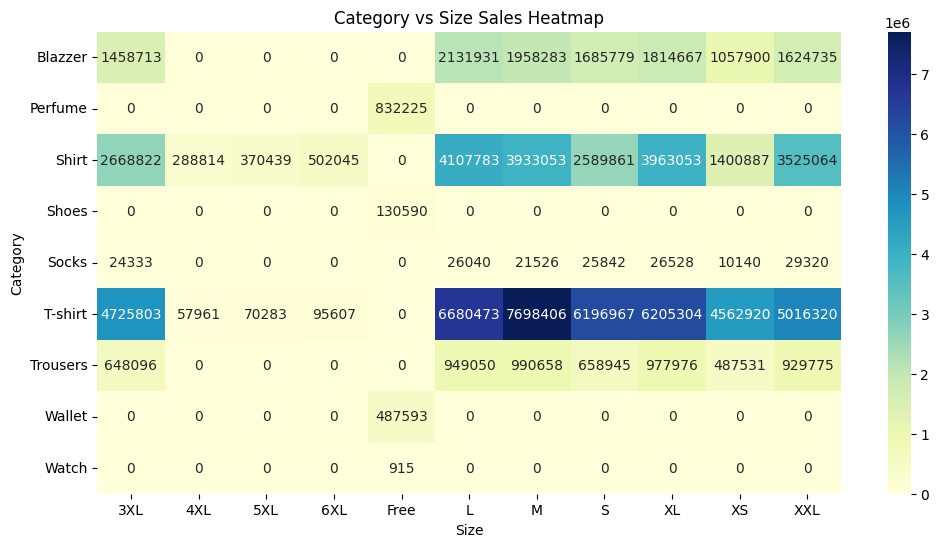

In [246]:
plt.figure(figsize=(12,6))
sns.heatmap(category_size, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Category vs Size Sales Heatmap")
plt.show()

 ## **Daily Sales Trend (Date wise)**

In [247]:
daily_sales = df.groupby("Date")["Amount"].sum()

#### **Daily sales vary significantly, with clear peaks on certain dates indicating higher demand.**

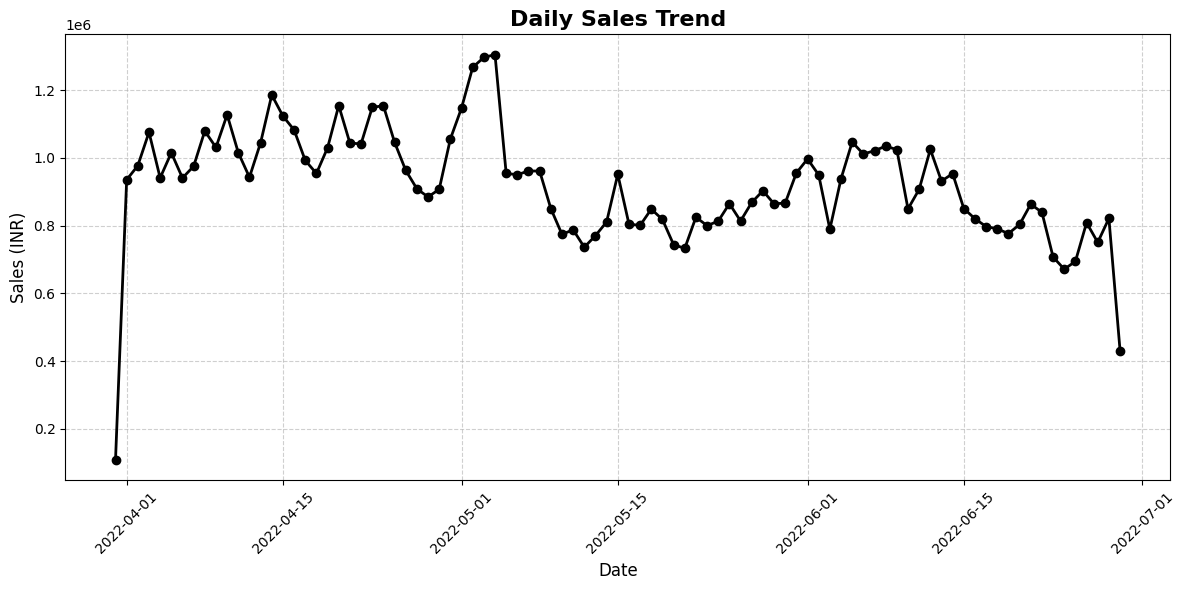

In [248]:
plt.figure(figsize=(12,6))
plt.plot(
    daily_sales.index,
    daily_sales.values,
    marker="o",
    linestyle="-",
    color="black",         # professional black
    linewidth=2,
    markersize=6
)

# Titles & labels
plt.title("Daily Sales Trend", fontsize=16, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Sales (INR)", fontsize=12)

# Grid and style
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(rotation=45)   # dates readable
plt.tight_layout()
plt.show()


### **Average Order Value by City**

In [249]:
city_average = df.groupby("ship-city")["Amount"].mean().sort_values(ascending=False).head(10)
city_average

,Amount
ship-city,
RAJGARH CHURU DISTRICT,2372.0
Amrath,1698.0
"Ithepalli, Chandragiri",1671.0
Mandya distic,1648.0
jagadhri,1613.0
Jashpurnagar,1613.0
SAKHINETIPALLE,1610.0
KHATRA,1593.0
Karimanagar,1549.0


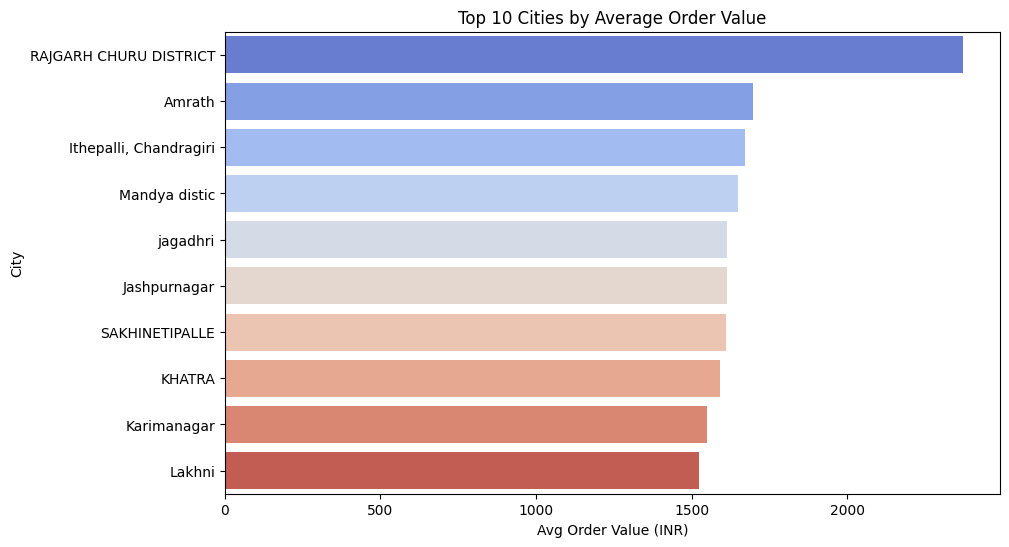

In [250]:
plt.figure(figsize=(10,6))
sns.barplot(x=city_average.values, y=city_average.index, palette="coolwarm")
plt.title("Top 10 Cities by Average Order Value")
plt.xlabel("Avg Order Value (INR)")
plt.ylabel("City")
plt.show()

### **Month & Year Heatmap (Seasonality)**

In [251]:
month_year = df.pivot_table(index="year", columns="month", values="Amount", aggfunc="sum", fill_value=0)

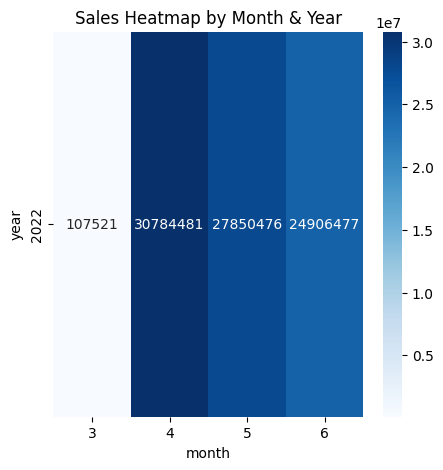

In [252]:
plt.figure(figsize=(5,5))
sns.heatmap(month_year, annot=True, fmt=".0f", cmap="Blues")
plt.title("Sales Heatmap by Month & Year")
plt.show()

###  **Cancelled vs Delivered Orders (Count + %)**

In [253]:
cancel_vs_deliver = (df["Status"].value_counts(normalize=True) * 100).head(5)
cancel_vs_deliver

,proportion
Status,
Shipped,60.332930
Shipped - Delivered to Buyer,22.295621
Cancelled,14.215048
Shipped - Returned to Seller,1.515011
Shipped - Picked Up,0.754404


#### **Most orders are successfully delivered, while a smaller share is cancelled or still in transit.**

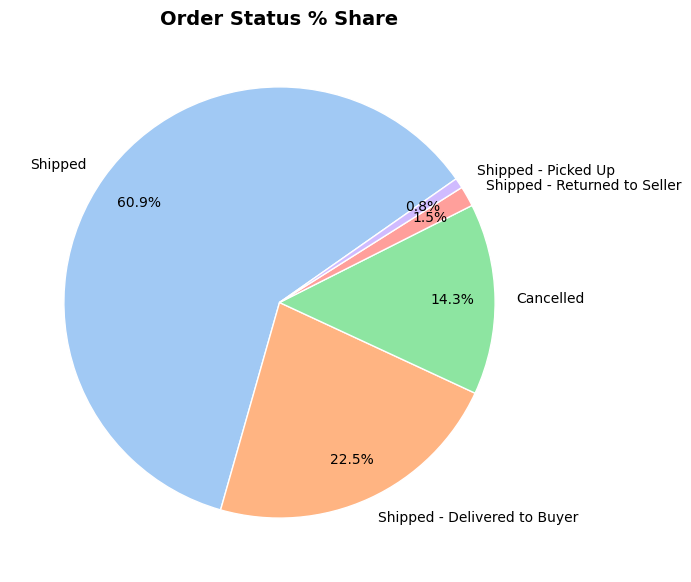

In [254]:
plt.figure(figsize=(7,7))  # thoda bada size
plt.pie(
    cancel_vs_deliver,
    labels=cancel_vs_deliver.index,
    autopct="%1.1f%%",
    startangle=35,
    colors=sns.color_palette("pastel"),  # soft professional colors
    wedgeprops={"edgecolor":"white"},    # white border between slices
    textprops={"fontsize":10},           # text size control
    pctdistance=0.8,                     # % text thoda andar
    labeldistance=1.1                    # labels thoda bahar
)
plt.title("Order Status % Share", fontsize=14, fontweight="bold")
plt.show()


##  **Sales Contribution by Sales Channel**

In [255]:
channel_sales = df.groupby("Sales Channel")["Amount"].sum()
channel_sales

,Amount
Sales Channel,
Amazon.in,8.356853e+07
Non-Amazon,8.042171e+04


#### **Most sales are contributed by Amazon.in Merchant channel, while other channels have a smaller share.**

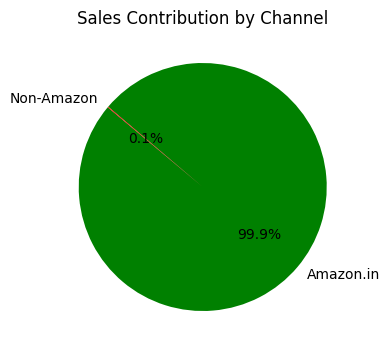

In [256]:
plt.figure(figsize=(4,5))
plt.pie(channel_sales, labels=channel_sales.index, autopct="%1.1f%%", startangle=140, colors=["green", "red"]
)
plt.title("Sales Contribution by Channel")
plt.show()

## **Sales Distribution (Histogram)**

1.   List item
2.   List item



#### **This histogram shows the distribution of order amounts. It helps identify common order value ranges, peaks, and rare high-value orders, giving insights into customer spending patterns.**

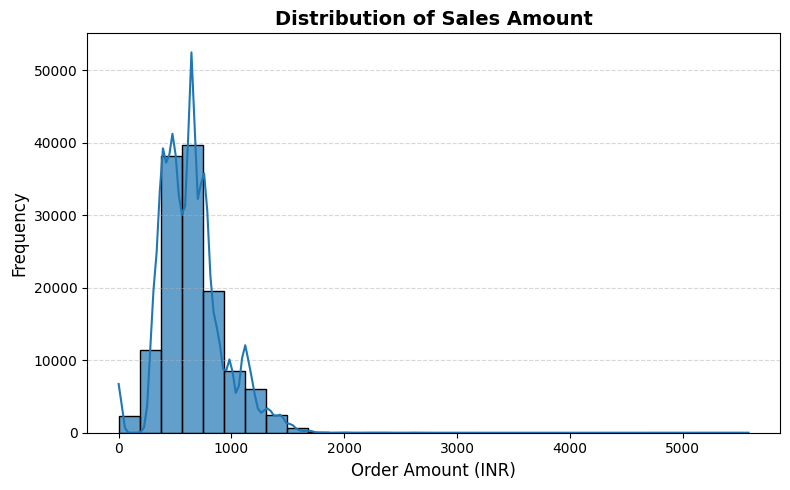

In [257]:
plt.figure(figsize=(8,5))
sns.histplot(
    df["Amount"],
    bins=30,
    kde=True,                  # shows smooth density curve
    color="#1f77b4",           # professional blue
    edgecolor="black",
    alpha=0.7
)

plt.title("Distribution of Sales Amount", fontsize=14, fontweight="bold")
plt.xlabel("Order Amount (INR)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)  # horizontal grid for readability
plt.tight_layout()
plt.show()


# **Boxplot - Amount by Category**

#### **This boxplot shows the distribution of sales amounts for each product category. It highlights median sales, interquartile ranges, and potential outliers, helping understand variability and top-performing categories**

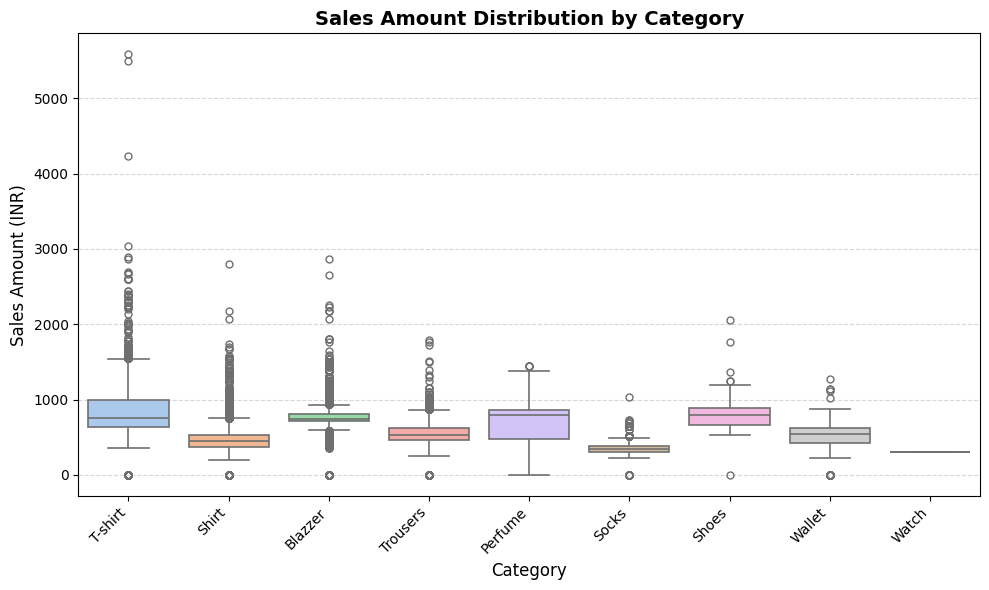

In [258]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x="Category",
    y="Amount",
    data=df,
    palette="pastel",
    fliersize=5,               # size of outlier points
    linewidth=1.2              # thicker box lines
)

plt.title("Sales Amount Distribution by Category", fontsize=14, fontweight="bold")
plt.xlabel("Category", fontsize=12)
plt.ylabel("Sales Amount (INR)", fontsize=12)
plt.xticks(rotation=45, ha="right")  # labels readable
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# **Sales by Size (Bar Chart)**

#### **This chart shows total sales by product size. It highlights which sizes contribute most to revenue and helps understand customer size preferences.**

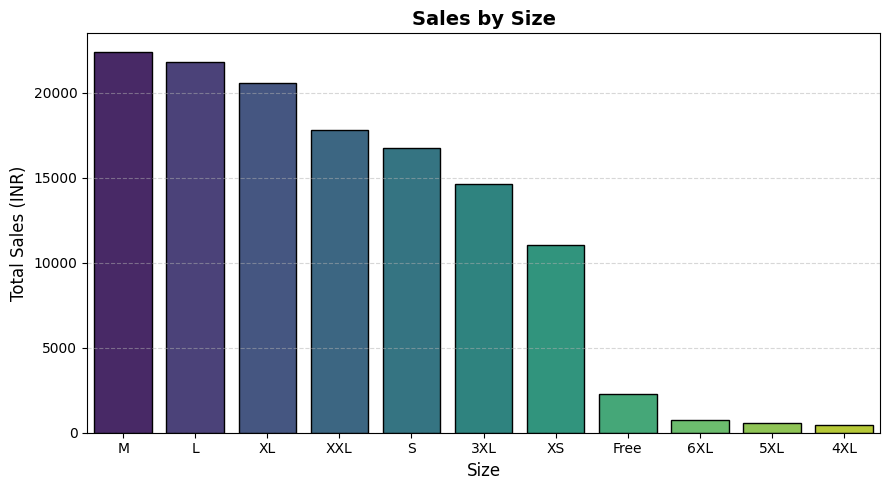

In [259]:
plt.figure(figsize=(9,5))
sns.barplot(
    x=size_preference.index,
    y=size_preference.values,
    palette="viridis",         # professional color gradient
    edgecolor="black"
)

plt.title("Sales by Size", fontsize=14, fontweight="bold")
plt.xlabel("Size", fontsize=12)
plt.ylabel("Total Sales (INR)", fontsize=12)

plt.grid(axis="y", linestyle="--", alpha=0.5)  # horizontal grid
plt.xticks(rotation=0)                          # size labels readable
plt.tight_layout()
plt.show()

# **Count of Orders by Day of Week**

#### **This chart shows the number of orders placed on each day of the week. It highlights peak order days and helps in understanding weekly demand patterns.**

In [260]:
# Convert date columns to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [261]:
# Create new features
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year
df['day_of_week'] = df['Date'].dt.day_name()

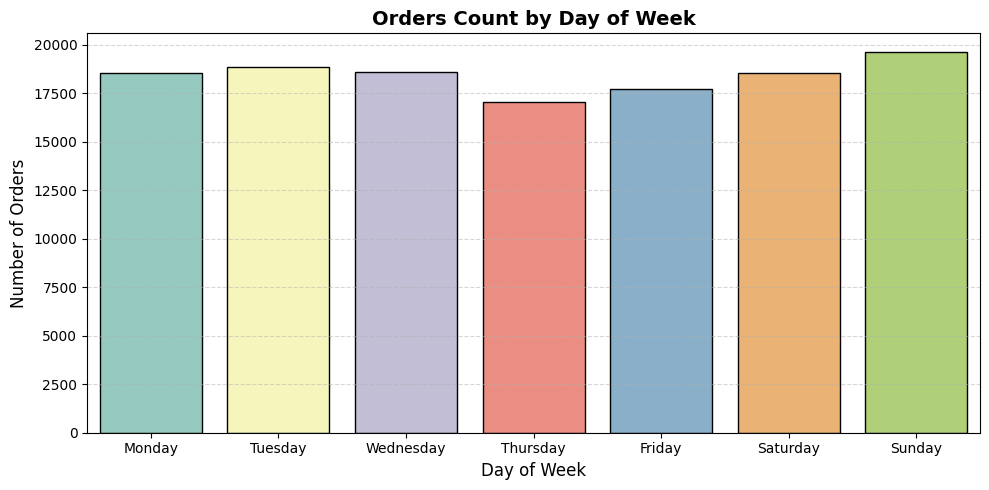

In [262]:
# plt.figure(figsize=(8,5))
# sns.countplot(x="day_of_week", data=df, order=["Monday","Tuesday","Wednesday",
#                "Thursday","Friday","Saturday","Sunday"],
#                palette="Set3")
# plt.title("Orders Count by Day of Week")
# plt.xlabel("Day of Week")
# plt.ylabel("Number of Orders")
# plt.show()
plt.figure(figsize=(10,5))
sns.countplot(
    x="day_of_week",
    data=df,
    order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],
    palette="Set3",
    edgecolor="black"
)

plt.title("Orders Count by Day of Week", fontsize=14, fontweight="bold")
plt.xlabel("Day of Week", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.5)  # horizontal grid for readability
plt.tight_layout()
plt.show()

# **Scatter Plot - Sales vs Postal Code (for outliers)**

#### **This scatter plot shows the relationship between postal codes and order amounts. Larger and darker points indicate higher-value sales, helping identify regions generating maximum revenue**

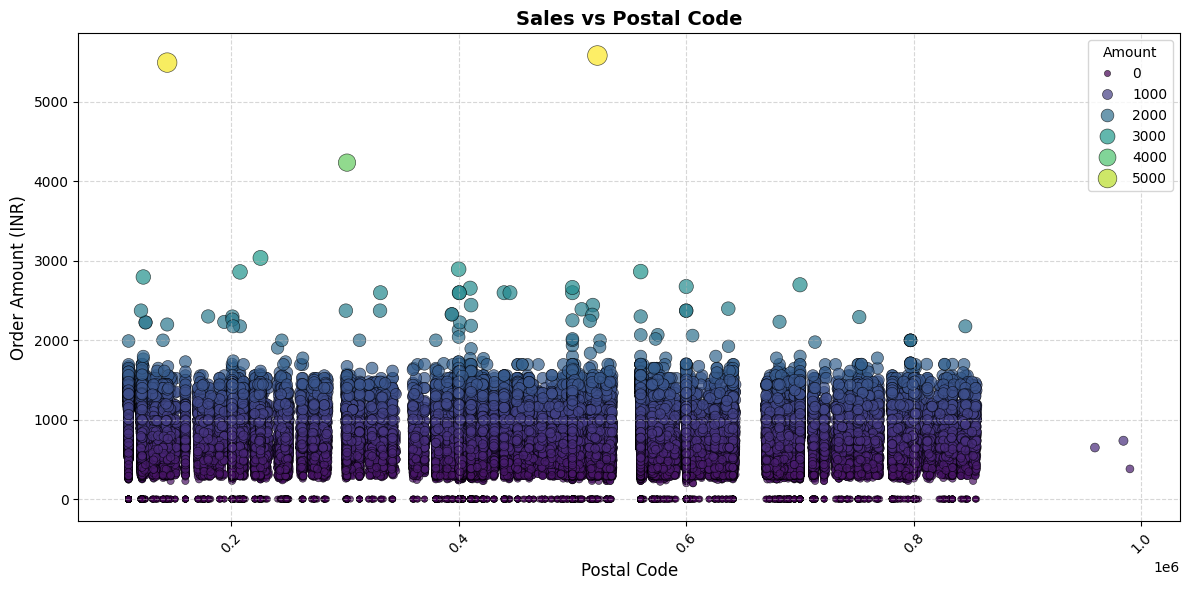

In [263]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    x="ship-postal-code",
    y="Amount",
    data=df,
    hue="Amount",                  # color by sales amount for clarity
    palette="viridis",
    size="Amount",                 # size proportional to sales
    sizes=(20, 200),               # min & max marker size
    alpha=0.7,
    edgecolor="black"
)

plt.title("Sales vs Postal Code", fontsize=14, fontweight="bold")
plt.xlabel("Postal Code", fontsize=12)
plt.ylabel("Order Amount (INR)", fontsize=12)
plt.xticks(rotation=45)           # postal codes readable
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## **Correlation Heatmap (Numerical Columns)**

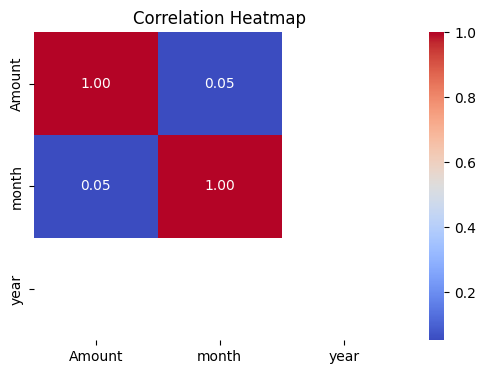

In [264]:
plt.figure(figsize=(6,4))
sns.heatmap(df[["Amount","month","year"]].corr(), annot=True, cmap="coolwarm",
            fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# **Pie Chart - Ship Country Sales**

#### **This chart shows the share of total sales contributed by each shipping country. It helps identify which countries generate the most revenue, highlighting key markets for the business**

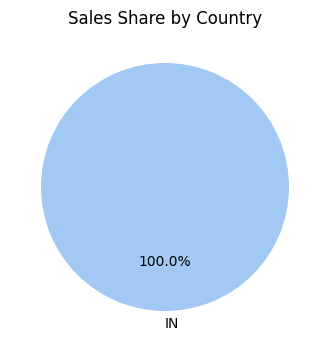

In [265]:
country_sales = df.groupby("ship-country")["Amount"].sum()
plt.figure(figsize=(4,5))
plt.pie(country_sales, labels=country_sales.index, autopct="%1.1f%%", startangle=90, colors=sns.color_palette("pastel"))
plt.title("Sales Share by Country")
plt.show()

## **Stacked Bar - Month vs Status**

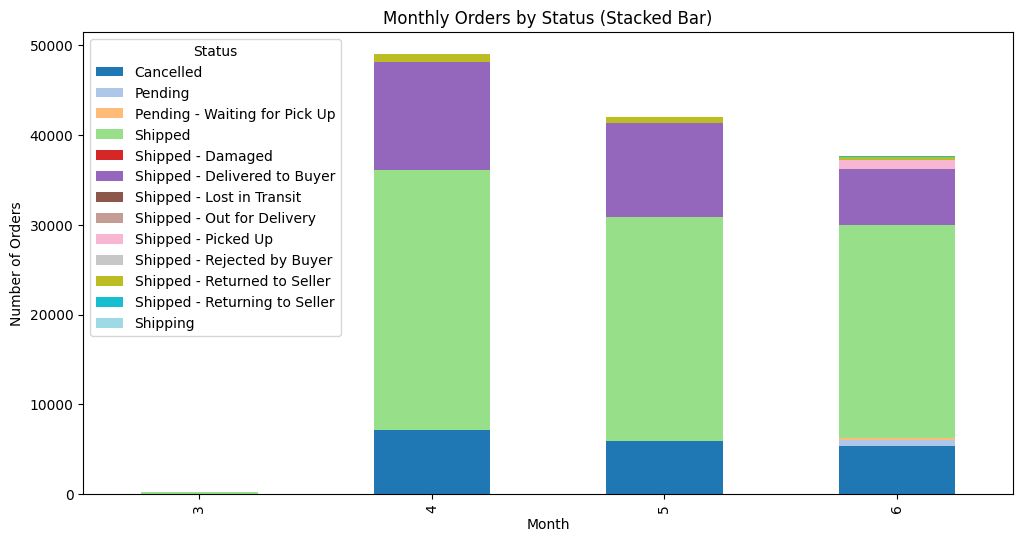

In [266]:
month_status = df.groupby(["month","Status"])["Order ID"].count().unstack().fillna(0)
month_status.plot(kind="bar", stacked=True, figsize=(12,6), colormap="tab20")
plt.title("Monthly Orders by Status (Stacked Bar)")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.show()

## **Treemap - Sales by Category**




In [267]:
!pip install squarify

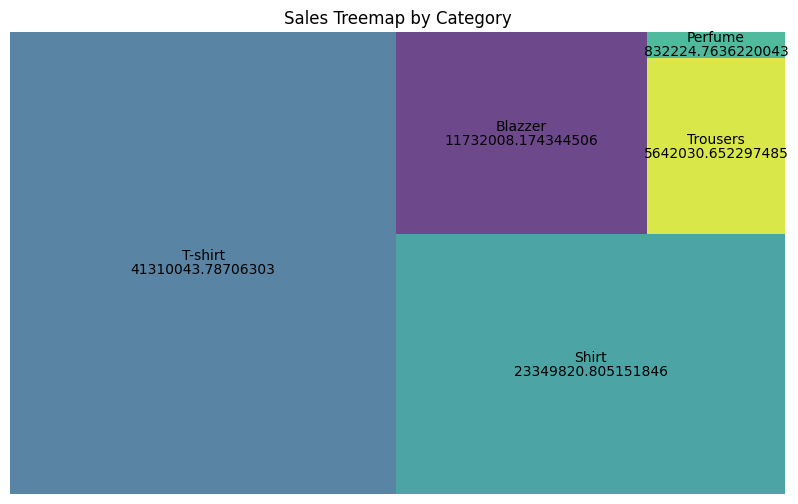

In [268]:
import squarify
category_sales = df.groupby("Category")["Amount"].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(10,6))
squarify.plot(sizes=category_sales.values, label=category_sales.index, value=category_sales.values, alpha=0.8)
plt.title("Sales Treemap by Category")
plt.axis("off")
plt.show()

## **Violin Plot - Sales by Day of Week**

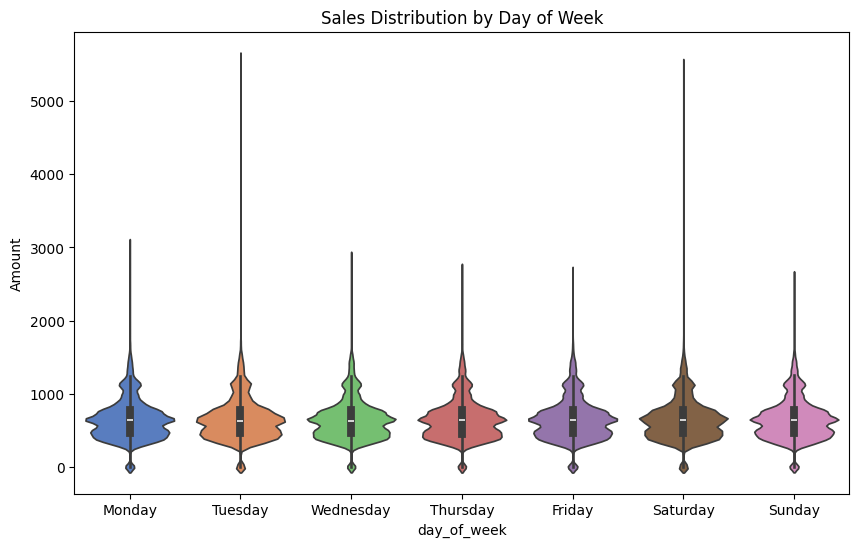

In [269]:
plt.figure(figsize=(10,6))
sns.violinplot(x="day_of_week", y="Amount", data=df, palette="muted",
               order=["Monday","Tuesday","Wednesday","Thursday"
               ,"Friday","Saturday","Sunday"])
plt.title("Sales Distribution by Day of Week")
plt.show()

## **Pairplot - Relationships in Data**

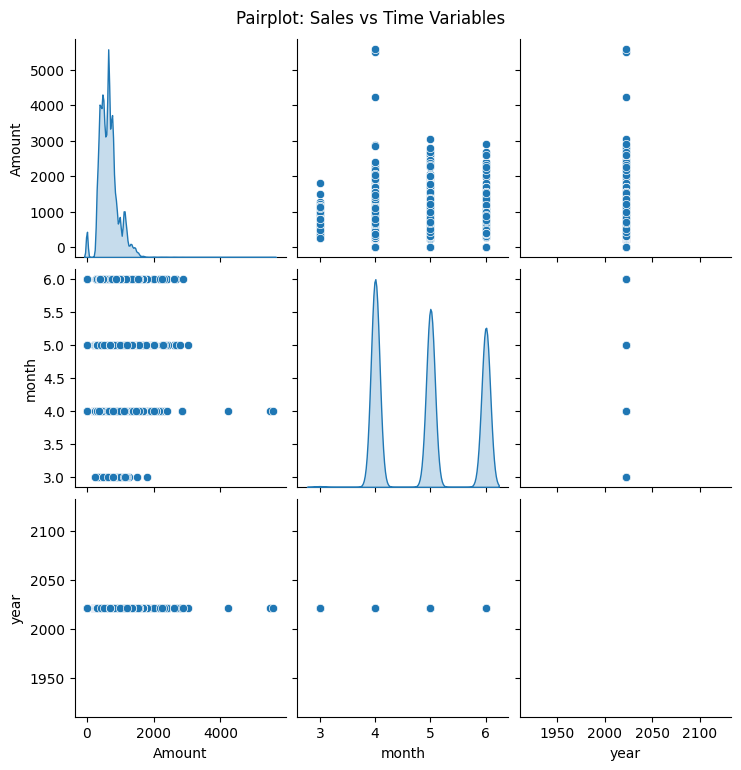

In [270]:
sns.pairplot(df[["Amount","month","year"]], diag_kind="kde")
plt.suptitle("Pairplot: Sales vs Time Variables", y=1.02)
plt.show()

# **1. Classification – Predict Order Status**

#### **(Target = Status → e.g., Delivered, Cancelled, etc.)**
---



In [271]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  classification_report, accuracy_score, confusion_matrix

In [272]:
# df=pd.read_csv('Amazon Sale Report.csv')

In [273]:
# Select features
X = df[["Fulfilment", "Sales Channel", "Category", "Size", "ship-state", "B2B"]]
y = df["Status"]

In [274]:
# Encode categorical variables
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

In [275]:
# Encode target as well
y = LabelEncoder().fit_transform(y.astype(str))

In [276]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [277]:
# Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [278]:
# Prediction
y_pred = clf.predict(X_test)

In [279]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8220654365017832


# **Accuracy: 0.8220654365017832**

In [280]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.00      0.01      3711
           1       0.00      0.00      0.00       141
           2       0.00      0.00      0.00        64
           3       0.87      1.00      0.93     15619
           5       0.73      0.99      0.84      5625
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00        11
           8       0.22      0.01      0.02       196
           9       0.00      0.00      0.00         1
          10       0.09      0.00      0.00       395
          11       0.00      0.00      0.00        31
          12       0.00      0.00      0.00         1

    accuracy                           0.82     25796
   macro avg       0.17      0.17      0.15     25796
weighted avg       0.71      0.82      0.75     25796



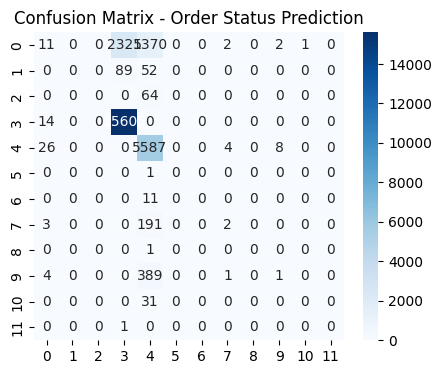

In [281]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Order Status Prediction")
plt.show()

# **2. Regression – Predict Sales Amount**

#### **(Target = Amount → continuous values in INR)**
---



In [282]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [283]:
# Select features (without Amount itself!)
X = df[["Fulfilment", "Sales Channel", "Category", "Size", "ship-state", "B2B", "Qty"]]
y = df["Amount"]

In [284]:
# Encode categorical variables
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))

In [285]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
# Model
reg = RandomForestRegressor(random_state=42)
reg.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [287]:
# Prediction
y_pred = reg.predict(X_test)

In [288]:
# Evaluation")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

RMSE: 209.03875740608368
R² Score: 0.41304111134867827


# **Regression Model Results**

1.   RMSE: 209.03875740608368
2.   R² Score: 0.41304111134867827

